**PROBLEM STATEMENT :**

The goal of this project is to analyze the factors influencing life expectancy 📈 and Develop a Linear Regression model using a dataset collected from the WHO and the United Nations. The dataset covers 193 countries from 2000 to 2015 and includes various health, economic, and social variables.

**Importing Libraries --**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

**Importing Dataset:**

In [ ]:
import kagglehub
import os

dataset_path = kagglehub.dataset_download('kumarajarshi/life-expectancy-who')
print(f"Dataset downloaded to: {dataset_path}")

csv_file_name = 'Life Expectancy Data.csv'
csv_file_path = os.path.join(dataset_path, csv_file_name)

Using Colab cache for faster access to the 'life-expectancy-who' dataset.
Dataset downloaded to: /kaggle/input/life-expectancy-who


**EDA**

In [ ]:
df = pd.read_csv(csv_file_path)

display(df.head())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe(include="all")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


Unique Values for Categorical Varibles

In [ ]:
for column in df.columns:
    if df[column].dtype == object:
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print("\n")

COUNTRY :  193
Country
Dominica                                                 1
Palau                                                    1
Niue                                                     1
Nauru                                                    1
Monaco                                                   1
                                                        ..
Zimbabwe                                                16
United Kingdom of Great Britain and Northern Ireland    16
Turkey                                                  16
Saint Vincent and the Grenadines                        16
Vanuatu                                                 16
Name: count, Length: 193, dtype: int64


STATUS :  2
Status
Developed      512
Developing    2426
Name: count, dtype: int64




There is no need of the country column

In [ ]:
df = df.drop('Country', axis=1)

Coverting categorical to Dummy Variables

In [ ]:
df = pd.get_dummies(df, columns=['Status'], drop_first=True)
# Convert boolean columns to integers (True to 1, False to 0)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [ ]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


Check For missing Values

In [ ]:
df.isnull().sum()

,0
Year,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34
under-five deaths,0


Inputting the Missing Values

In [ ]:
for column in df.columns:
    if df[column].dtype !='object' :
        mean=df[column].mean()
        df[column]=df[column].fillna(mean)

df.isnull().sum()

,0
Year,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0


In [ ]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.825732
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,...,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381,0.379405
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,...,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,1.000000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,...,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000,1.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000


Check For Duplicates

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**Correlation Plot**

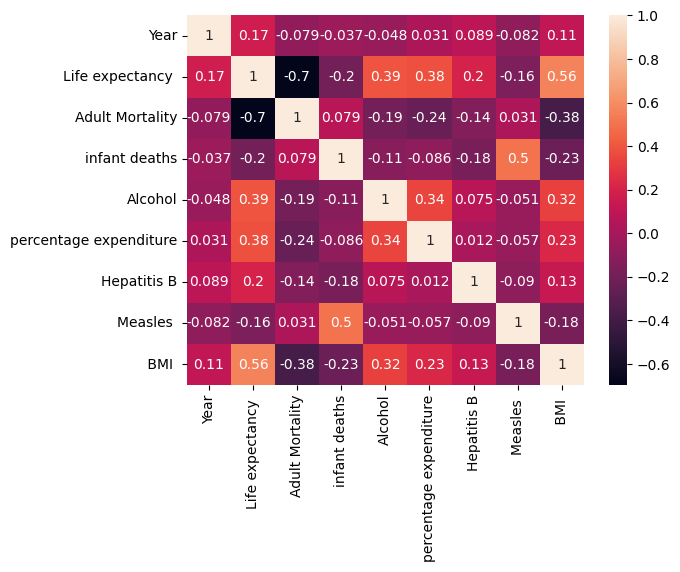

In [ ]:
sns.heatmap(df.iloc[:,0:9].corr(), annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2938 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  Diphtheria          

**Outlier Checks**

Let's visualize the distribution of some columns using boxplots to check for outliers.

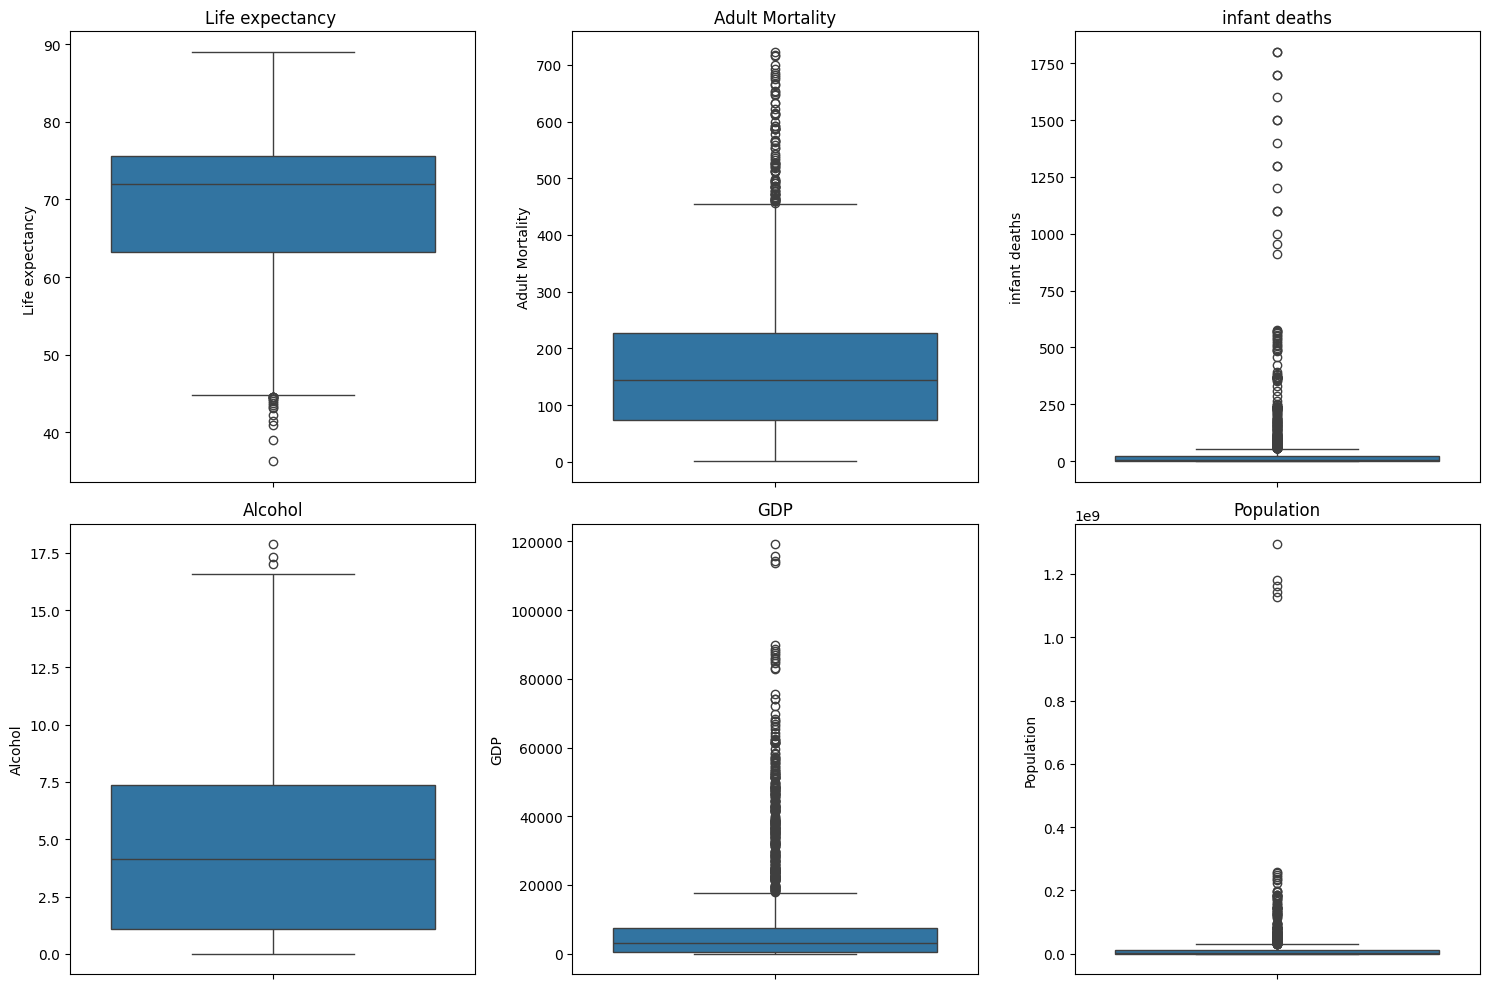

In [ ]:
# Select a few columns for visualization
selected_columns = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'GDP', 'Population']

# Create boxplots for the selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
def remove_outlier(col) :
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
for column in df.columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])

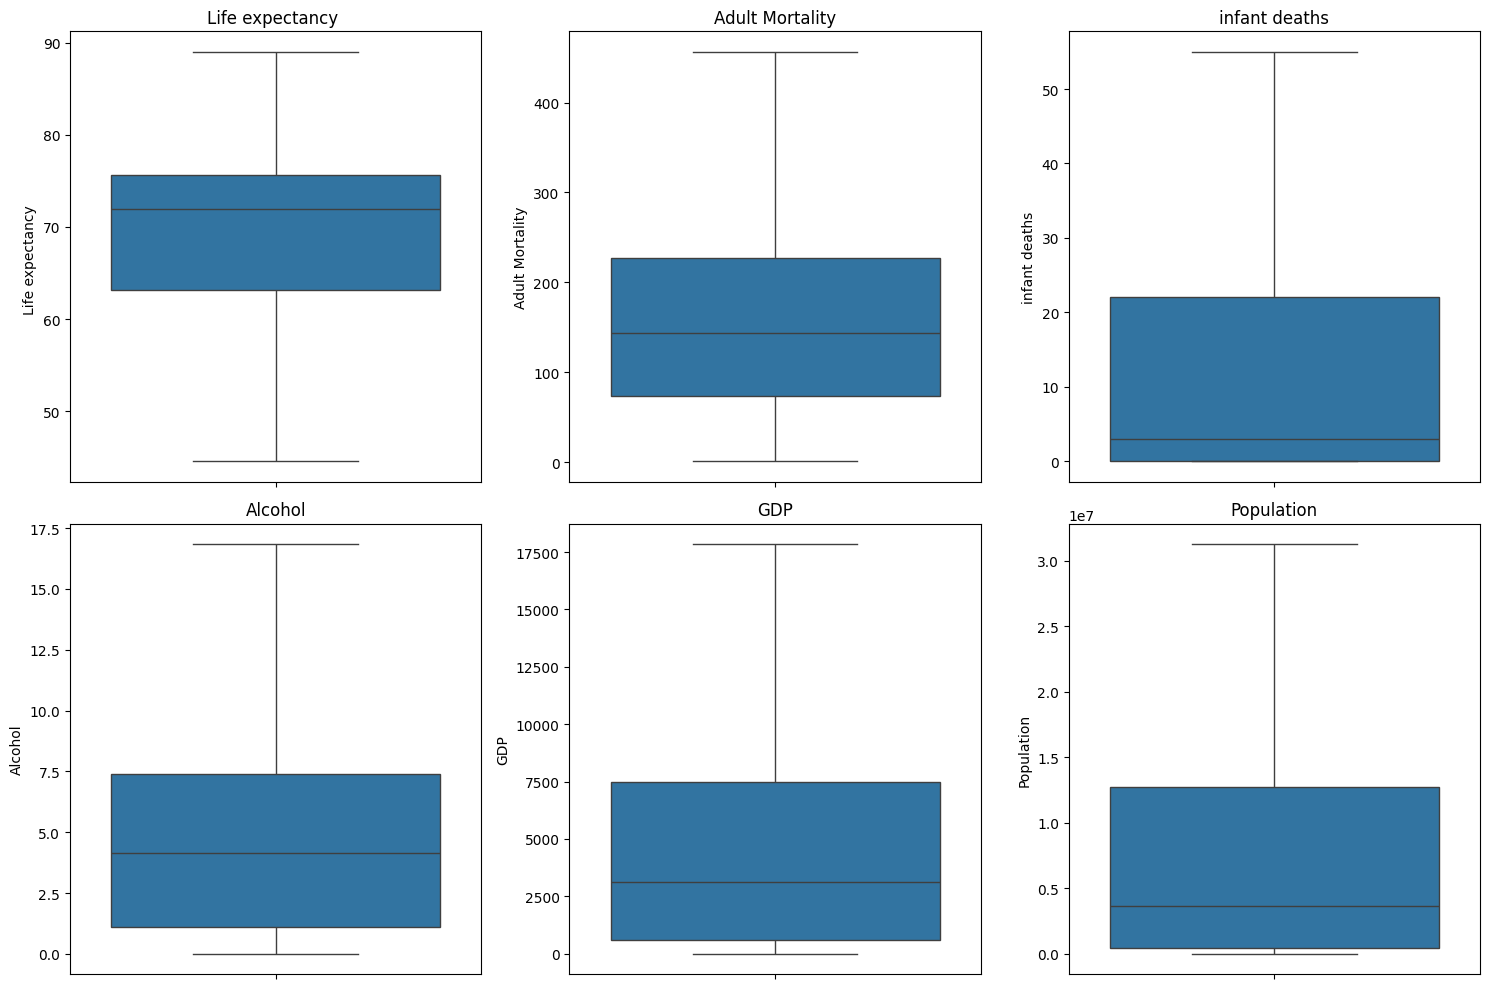

In [ ]:
# Select a few columns for visualization
selected_columns = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'GDP', 'Population']

# Create boxplots for the selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(2938, 21)

Data Distribution

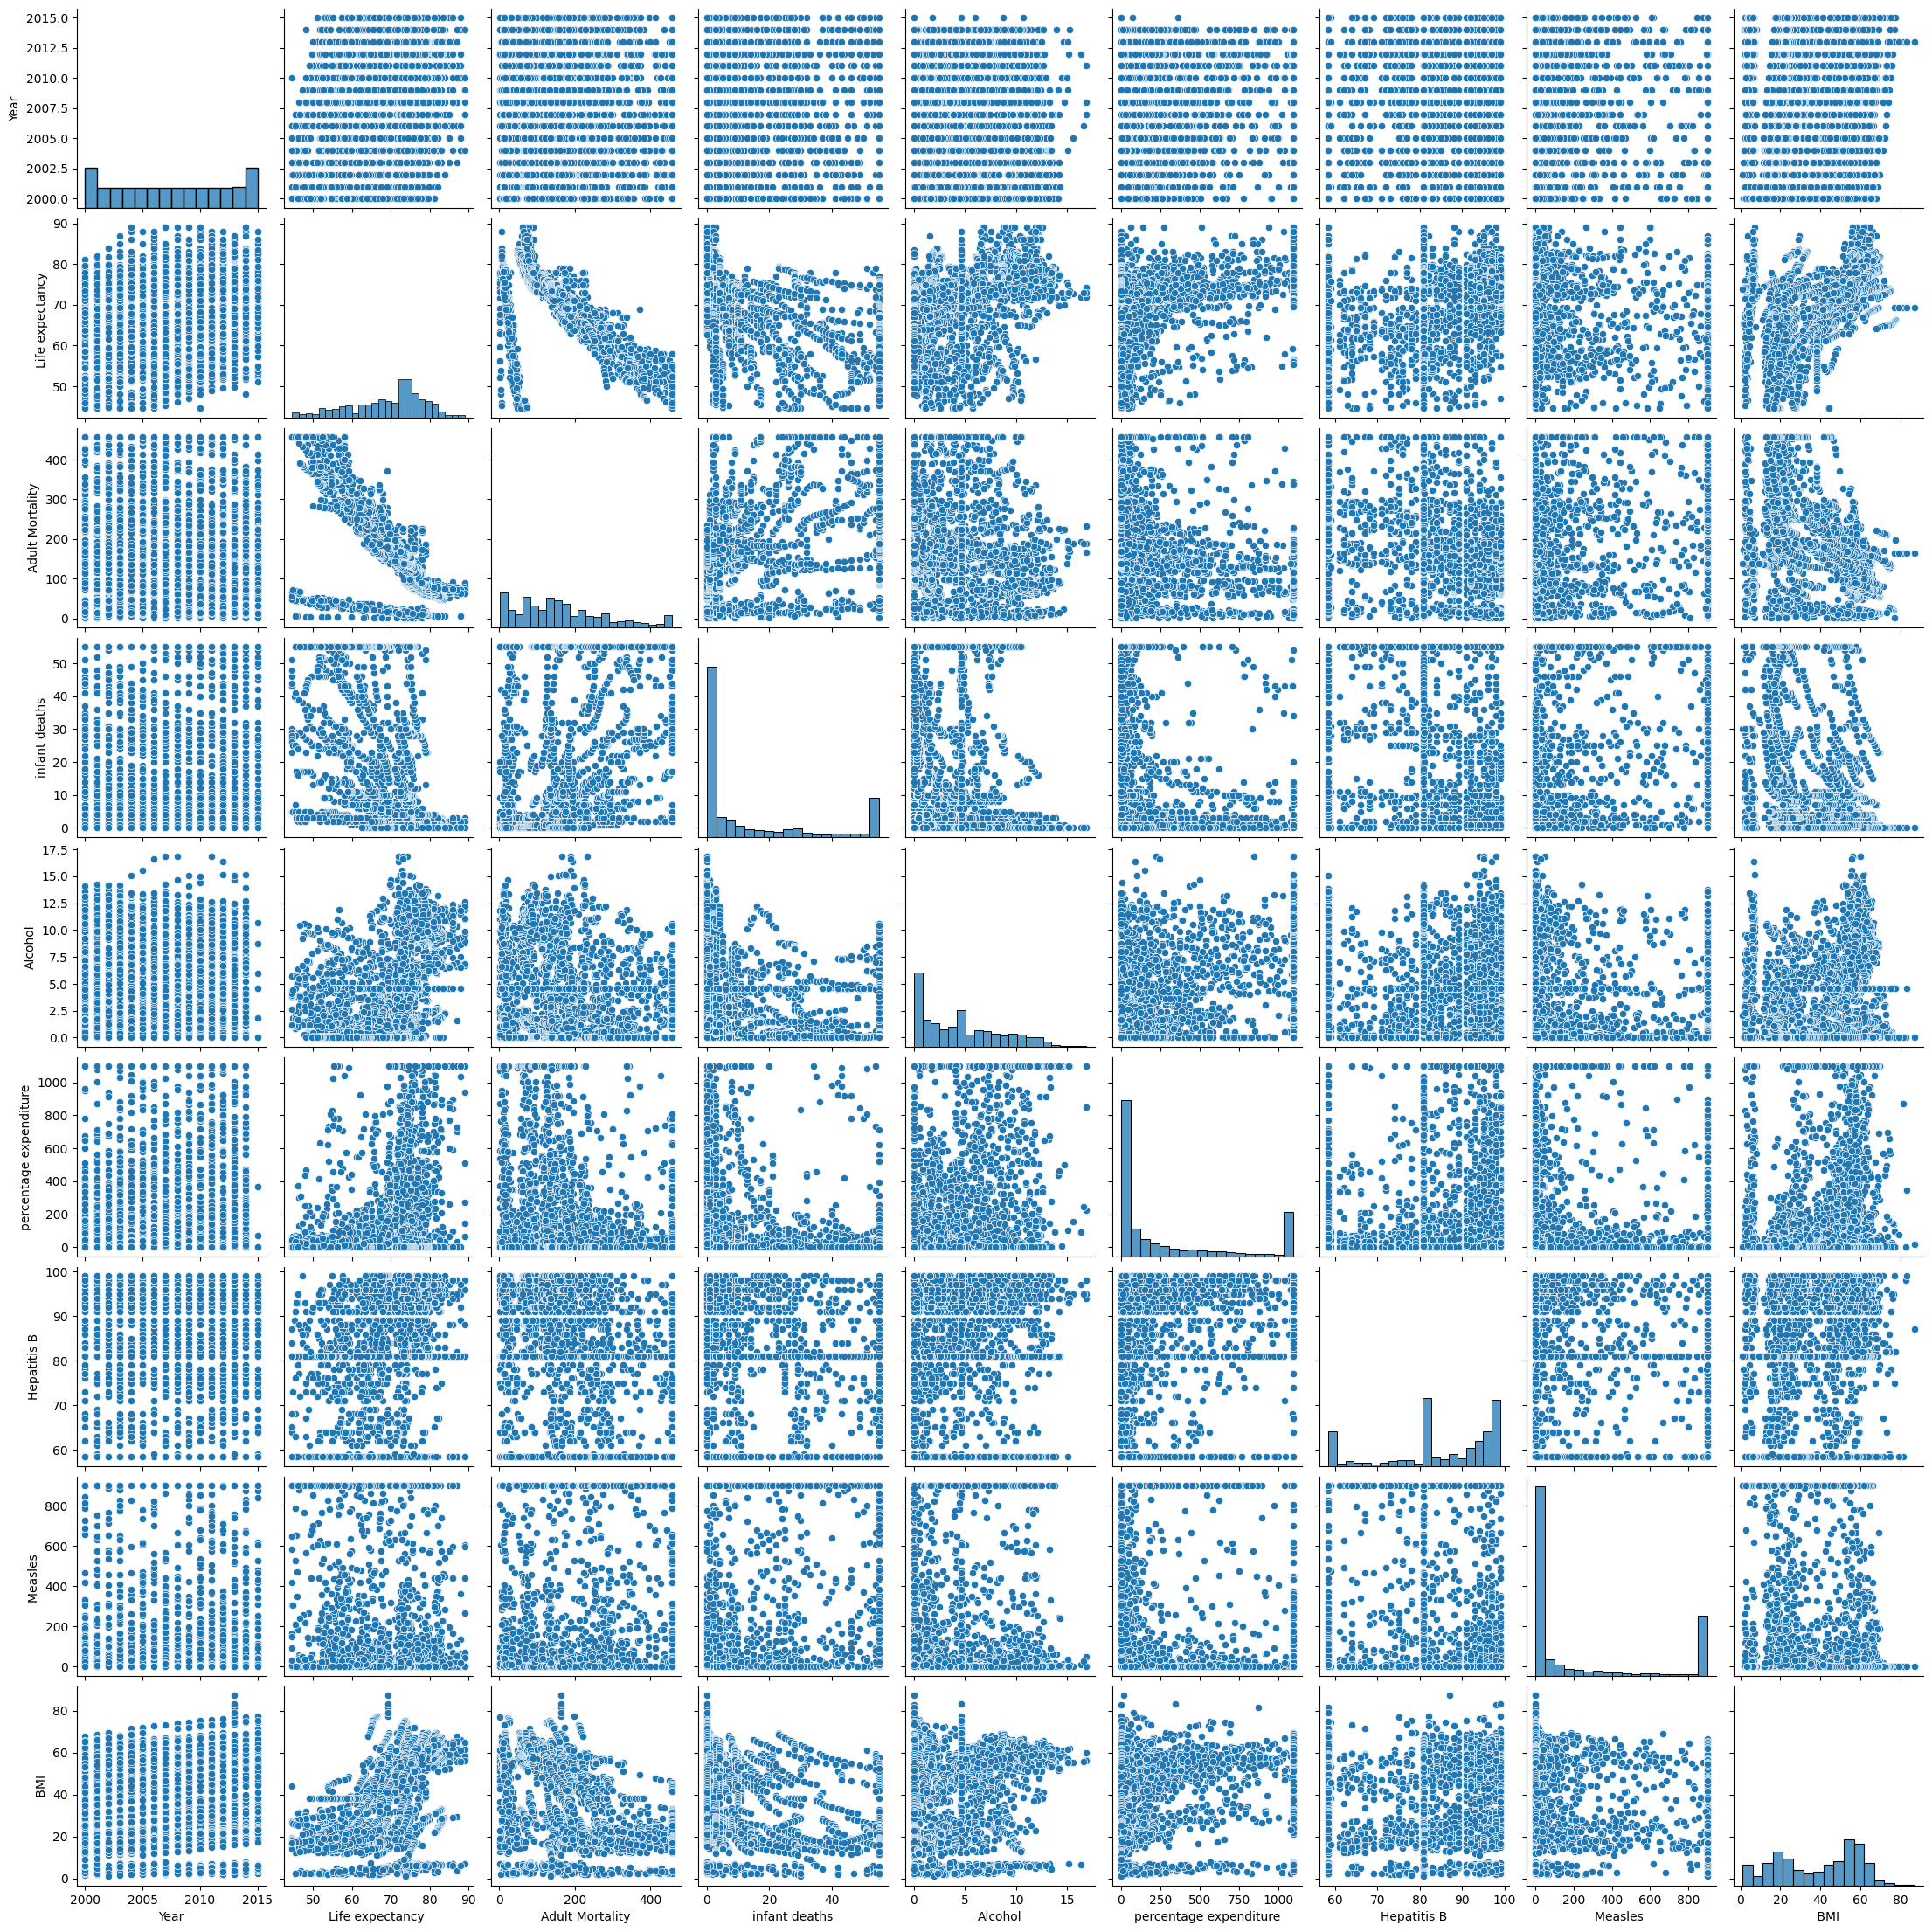

In [ ]:
df_attr=(df.iloc[:,0:9])
sns.pairplot(df_attr)
plt.show()

Train-Test Split

In [ ]:
x=df.drop('Life expectancy ',axis=1)
y=df[['Life expectancy ']]

In [ ]:
x.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015.0,263.0,55.0,0.01,71.279624,65.0,900.625,19.1,70.0,49.5,8.16,65.0,0.1,584.259210,3.125506e+07,15.35,15.6,0.479,10.1,1.0
1,2014.0,271.0,55.0,0.01,73.523582,62.0,492.000,18.6,70.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.35,15.6,0.476,10.0,1.0
2,2013.0,268.0,55.0,0.01,73.219243,64.0,430.000,18.1,70.0,62.0,8.13,64.0,0.1,631.744976,3.125506e+07,15.35,15.6,0.470,9.9,1.0
3,2012.0,272.0,55.0,0.01,78.184215,67.0,900.625,17.6,70.0,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,15.35,15.6,0.463,9.8,1.0
4,2011.0,275.0,55.0,0.01,7.097109,68.0,900.625,17.2,70.0,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,15.35,15.6,0.454,9.5,1.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Linear Regression Model

In [ ]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is 0.10434831715413193
The coefficient for Adult Mortality is -0.0171419488007982
The coefficient for infant deaths is 0.25120017124120486
The coefficient for Alcohol is 0.0879229243906459
The coefficient for percentage expenditure is 0.0015319727580548846
The coefficient for Hepatitis B is -0.04632397929696664
The coefficient for Measles  is -0.00011092690296805813
The coefficient for  BMI  is -0.0039012320257892797
The coefficient for under-five deaths  is -0.24397136965696933
The coefficient for Polio is 0.01905735497868079
The coefficient for Total expenditure is 0.06663464367022386
The coefficient for Diphtheria  is 0.05873004057104149
The coefficient for  HIV/AIDS is -4.895265597271479
The coefficient for GDP is 3.52028397472029e-05
The coefficient for Population is 2.8657310258820257e-08
The coefficient for  thinness  1-19 years is 0.004384908674694853
The coefficient for  thinness 5-9 years is -0.14818645074555023
The coefficient for Income composition 

In [ ]:
#let us check the intercept for the model

intercept=regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -145.0470459643875


In [ ]:
#R square on training data
regression_model.score(x_train,y_train)

0.8500482430721688

85% of the variation in life expectancy is explained by the predictors in the model for train set

In [ ]:
#R square on testing data
regression_model.score(x_test,y_test)

0.8579071331912294

In [ ]:
#RMSE on Training Data

predicted_train=regression_model.fit(x_train,y_train).predict(x_train)
rmse_train=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print('RMSE on train dataset : ', rmse_train)

RMSE on train dataset :  3.6690683997621076


In [ ]:
#RMSE on testing data

predicted_test=regression_model.fit(x_train,y_train).predict(x_test)
rmse_test=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print('RMSE on test dataset : ', rmse_test)

RMSE on test dataset :  3.572577003421458
